<a href="https://colab.research.google.com/github/dinesh-umkc/kdm/blob/main/ICP_5_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective
1. Read spam dataset and create visualizations Word Cloud with diffrent shapes
2. Use TF-IDF vectors (Word, N-Gram, Hash)
3. Use diffrent classifier to classifiy the dataset between spam or ham
4. Compare the classification accuracy of diffrent alogorithms  

In [17]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud 
from wordcloud import STOPWORDS 
import nltk 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns 
#import scikitplot as skplt #
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #



#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from PIL import Image

In [18]:
#Gdrive access
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [19]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#Read the data
df = pd.read_csv('/content/gdrive/MyDrive/Projects/Data/spam.csv', encoding = 'latin-1')

In [21]:
df = df[['v1', 'v2']]
df.columns = ['Label', 'Message']
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
#Get words for HAM & SPAM
stopwords = list(STOPWORDS)
STOPWORDS_NLTK = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS_NLTK

ham_dataset = df[df.Label == 'ham']
spam_dataset = df[df.Label == 'spam']
ham_words = ' '
spam_words = ' '

for words in ham_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "

# Data Visualization



				 HAM WORDS


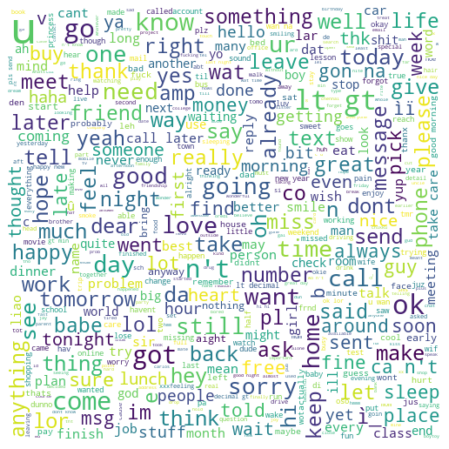

				 SPAM WORDS


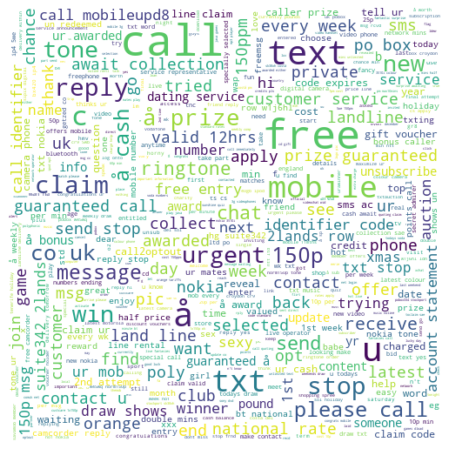

In [48]:
def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
print("\n")    
print("\t\t\t\t HAM WORDS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(spam_words)
gen_wordcloud(wordcloud)



				 HAM WORDS


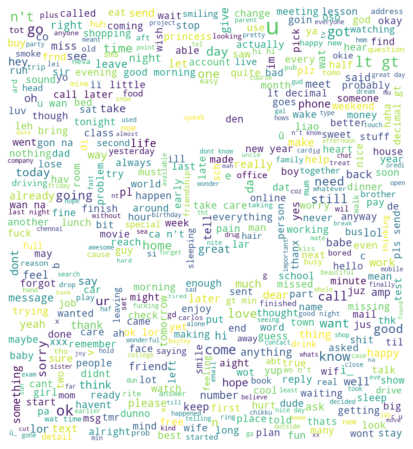

				 SPAM WORDS


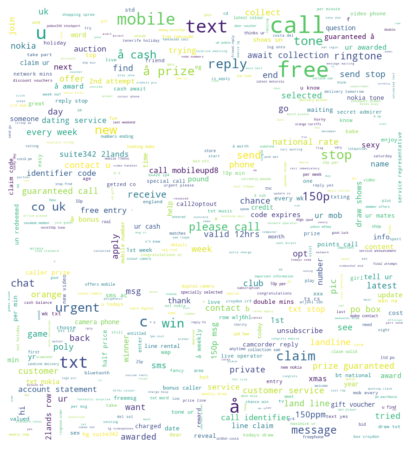

In [49]:
custom_mask = np.array(Image.open('/content/gdrive/MyDrive/Projects/Data/spongbob.png'))
print("\n")    
print("\t\t\t\t HAM WORDS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42,mask=custom_mask).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42,mask=custom_mask).generate(spam_words)
gen_wordcloud(wordcloud)



				 HAM WORDS


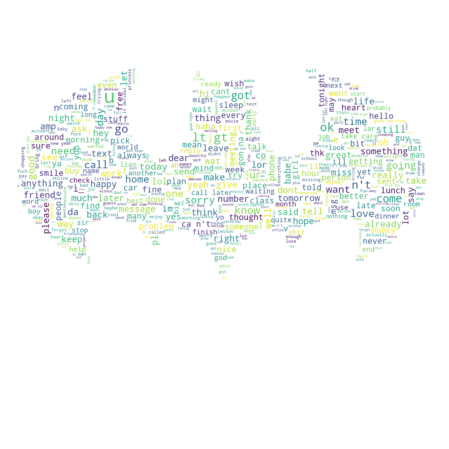

				 SPAM WORDS


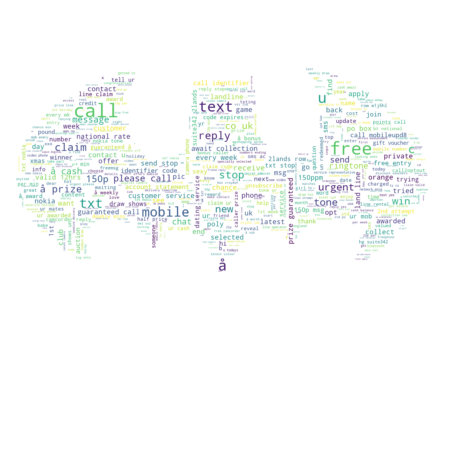

In [50]:
custom_mask = np.array(Image.open('/content/gdrive/MyDrive/Projects/Data/batman.png'))
print("\n")    
print("\t\t\t\t HAM WORDS")    
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42,mask=custom_mask).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42,mask=custom_mask).generate(spam_words)
gen_wordcloud(wordcloud)

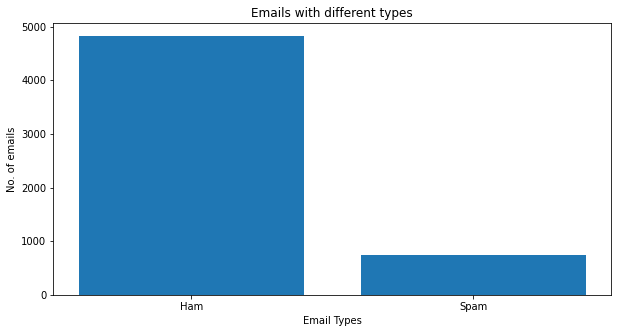

In [67]:
count_Class = pd.value_counts(df.Label, sort = True)

# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]


# creating the dataset
data = {'Ham':count_Class[0], 'Spam':count_Class[1]}
types = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(types, values)
 
plt.xlabel("Email Types")
plt.ylabel("No. of emails")
plt.title("Emails with different types")
plt.show()

#Vectorization